# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
print(api_key)


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

07d7cfb49d3254841a44d88e77e93cf0


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Lists to hold data frame variables
temp = []
humidity = []
clouds = []
latitude = []
wind_speed = []
city_name = []
city_id = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5)
lat_lngs = zip(lats, lngs)
print(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
        city = city.replace(' ','%20')
        query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + api_key + "&units=imperial"
        print(query_url)
        
        response = requests.get(f'{query_url}').json()
        response

        temp.append(response['main']['temp'])
        temp

        humidity.append(response['main']['humidity'])
        humidity

        clouds.append(response['clouds']['all'])
        clouds

        wind_speed.append(response['wind']['speed'])
        wind_speed
        
        latitude.append(response['coord']['lat'])
        latitude
        
        city_id.append(response['id'])
        city_id
        
        city_name.append(response['name'])
        city

        print(f'city= {city}, city ID = {city_id}')
        print(city)
        
        time.sleep(2.01)
        
# Print the city count to confirm sufficient count
#len(cities)

[-84.30116559 -38.81381771  54.67310422 -45.65949196  80.29374937] [-101.45720877  -87.56236405   87.14008361  -87.87578604  -64.57838359]
http://api.openweathermap.org/data/2.5/weather?q=punta%20arenas&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
city= punta%20arenas, city ID = [3874787]
punta%20arenas
http://api.openweathermap.org/data/2.5/weather?q=lebu&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
city= lebu, city ID = [3874787, 344979]
lebu
http://api.openweathermap.org/data/2.5/weather?q=zelenogorskiy&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
city= zelenogorskiy, city ID = [3874787, 344979, 1485284]
zelenogorskiy
http://api.openweathermap.org/data/2.5/weather?q=castro&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
city= castro, city ID = [3874787, 344979, 1485284, 3896218]
castro
http://api.openweathermap.org/data/2.5/weather?q=narsaq&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
city= narsaq, city ID = [3874787, 344979, 1485284, 389621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
### Convert Raw Data to DataFrame
weather_data = {'Temperature': temp, 'Humidity': humidity, 'Cloudiness': clouds, 'Wind Speed': wind_speed, 'City Name': city_name, 'City ID': city_id, 'Latitude': latitude}
weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head()

#* Export the city data into a .csv.

#* Display the DataFrame

,Temperature,Humidity,Cloudiness,Wind Speed,City Name,City ID,Latitude
0,43.12,75,75,11.41,Punta Arenas,3874787,-53.16
1,71.60,33,20,13.87,Lebu,344979,8.96
2,33.80,74,40,6.71,Zelenogorskiy,1485284,55.03
3,48.20,81,75,9.17,Castro,3896218,-42.48
4,32.00,61,75,3.36,Narsaq,3421719,60.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

No handles with labels found to put in legend.


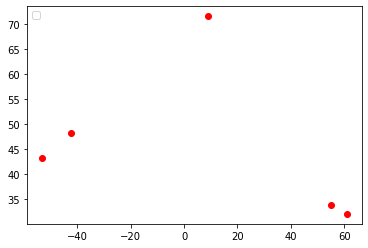

<Figure size 432x288 with 0 Axes>

In [24]:
# Scatterplot 1
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperature"], color = "r", marker="o")

plt.xlabel = ("Latitude")
plt.ylabel = ("Temperature (F)")
plt.title = ("Latitude vs. Temperature on 10/30")
plt.legend(loc='upper left')

plt.show()
plt.savefig("lat_vs_temp.png")

#### Latitude vs. Humidity Plot

No handles with labels found to put in legend.


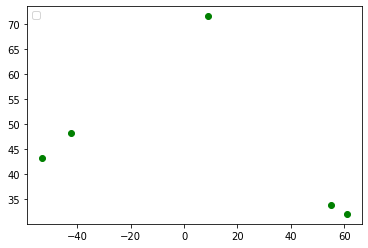

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperature"], color = "g", marker="o")

plt.xlabel = ("Latitude")
plt.ylabel = ("Temperature (F)")
plt.title = ("Latitude vs. Temperature on 10/30")
plt.legend(loc='upper left')

plt.show()
plt.savefig("lat_vs_hum.png")

#### Latitude vs. Cloudiness Plot

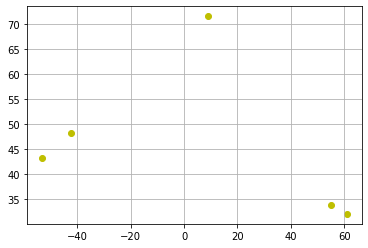

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], color = "y", marker="o")

plt.xlabel = ("Latitude")
plt.ylabel = ("Cloudiness")
plt.title = ("Latitude vs. Cloudiness on 10/30")
plt.grid(True)

plt.show()
plt.savefig("lat_vs_cloud.png")

#### Latitude vs. Wind Speed Plot

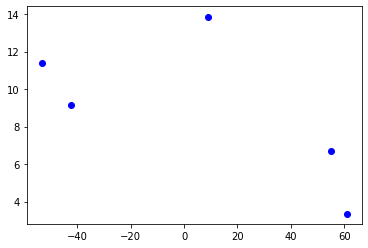

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], color = "b", marker="o")

plt.xlabel = ("Latitude")
plt.ylabel = ("Wind Speed")
plt.title = ("Latitude vs. Wind Speed on 10/30")

plt.show()
plt.savefig("lat_vs_wind.png")